In [1]:
from mynimize import *
from collections import namedtuple

In [2]:
params = namedtuple('params', ['x', 'y'])
def dumb_loss(p):
    return (p.x**2).sum()+(p.y**2).sum()

opt_options = OptOptions(
    num_iterations=1000,
    keep_history=True
)

Single run.

OptMultiResult(best_loss 0.0, success_ratio 1.0, num_samples 1)
CPU times: user 1.09 s, sys: 26.6 ms, total: 1.12 s
Wall time: 1.12 s


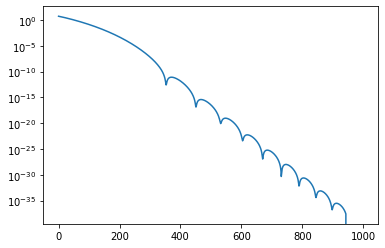

In [3]:
%%time
initial_params = [params(jnp.linspace(0, 1, 5), jnp.linspace(0, 1, 10))]
results = mynimize(dumb_loss, initial_params, opt_options)

print(results)

res = results.best_result
res.plot_loss_history()

Parallel runs are fast. However, a lot of time is spent on post-processing. Much quicker if `opt_options.keep_history=False`.

OptMultiResult(best_loss 0.0, success_ratio 0.5, num_samples 2)
CPU times: user 12.8 s, sys: 306 ms, total: 13.1 s
Wall time: 13.1 s


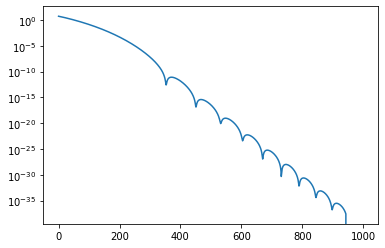

In [4]:
%%time

num_samples = 100
initial_params = [params(jnp.linspace(i, i+1, 5), jnp.linspace(i, i+1, 10)) for i in range(num_samples)]
results = mynimize(dumb_loss, initial_params, opt_options)

print(results)

res = results.best_result
res.plot_loss_history()